# Install the Dependencies

In [1]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install Seaborn


   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.8 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.8 kB 393.8 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.8 kB 901.1 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.8 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 294.8/294.8 kB 1.5 MB/s eta 0:00:00


In [3]:
pip install pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.6 MB 825.8 kB/s eta 0:00:14
    --------------------------------------- 0.2/11.6 MB 1.5 MB/s eta 0:00:08
   - -------------------------------------- 0.4/11.6 MB 2.3 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/11.6 MB 3.4 MB/s eta 0:00:04
   --- ------------------------------------ 1.1/11.6 MB 4.5 MB/s eta 0:00:03
   --- ------------------------------------ 1.2/11.6 MB 4.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/11.6 MB 3.4 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.6 MB 3.4 MB/s eta 0:00:04
   ---- ----------------------------------- 1.4/11.6 MB 3.3 MB/s eta 0:00:04
   ---- ----------------------------------- 1.4/11.6 MB 3.3 MB/s eta 0:00:04
   ----- ---------------------------------- 1.6/11.6 MB 2.8 MB/s eta 0:00:04
   ----- --

In [5]:
pip install -U scikit-learn


     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.4 kB 667.8 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 643.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 3.8 MB/s eta 0:00:03
    --------------------------------------- 0.2/10.6 MB 3.1 MB/s eta 0:00:04
   - -------------------------------------- 0.5/10.6 MB 3.6 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/10.6 MB 3.3 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/10.6 MB 4.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/10.6 MB 4.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/10.6 MB 4.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/10.6 MB 4.6 MB/s eta 0:00:03
   ---- 

# Import the Dependencies

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

## Load the Data

In [9]:
data = pd.read_csv("bank-full.csv", delimiter=";")

In [11]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Visualizaing the Data

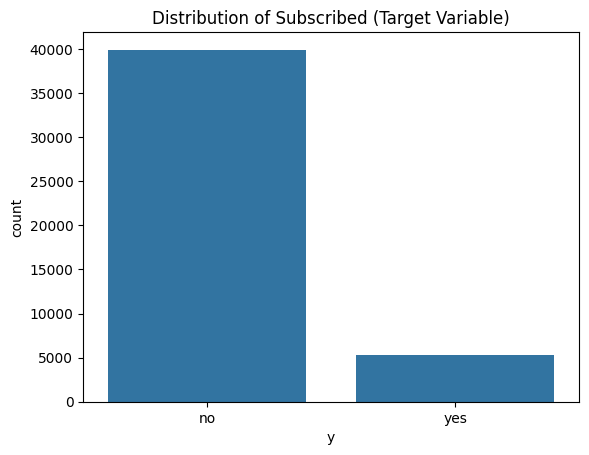

In [10]:
sns.countplot(x="y", data=data)
plt.title("Distribution of Subscribed (Target Variable)")
plt.show()


In [12]:
X = data.drop("y", axis=1)
y = data["y"]

# Split the Data into Traning and Testing Set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Printing the Columns

In [14]:
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


# Data Preprocessing ( Handle Missing Values , Encode Categorical Variable etc)

In [16]:

categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]


X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns)


print(X_train_encoded.isnull().sum())


age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
default_no             0
default_yes            0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
contact_cellular       0
contact_telephone      0
contact_unknown        0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0


# Standart the Features

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

## Build and Train the Logistic Regression Model

In [18]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

# Predictions and Evaluation

In [19]:
y_pred = model.predict(X_test_scaled)
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

# Accuracy

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8987061815769103


# Classification Report

In [21]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.98      0.94      7952
         yes       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



# Confucion Matrix

Confusion Matrix:
 [[7755  197]
 [ 719  372]]


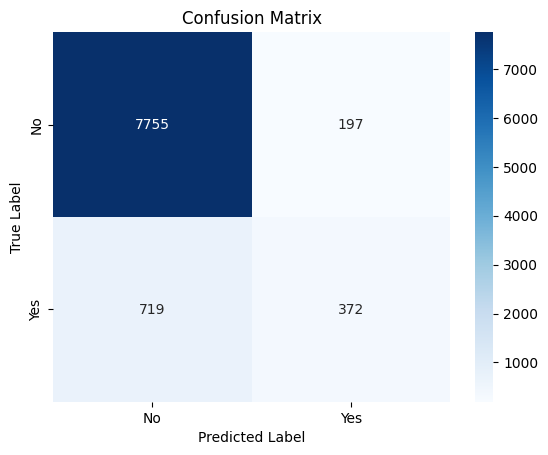

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Visualize ROC Curve

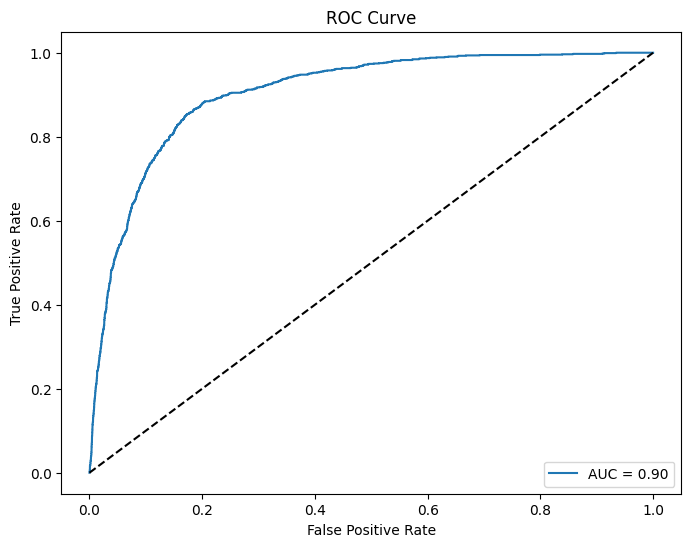

In [24]:
fpr, tpr, _ = roc_curve(y_test_binary, model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()